#diabetes

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [42]:
db = pd.read_csv('diabetes_data.csv')

#pre processing

In [43]:
print(db.head())

   user_id        date     weight      height  blood_glucose  \
0        1  2021-01-01  77.450712  183.993554     112.992869   
1        2  2021-01-02  67.926035  179.246337     134.219253   
2        3  2021-01-03  79.715328  170.596304     108.303203   
3        4  2021-01-04  92.845448  163.530632     127.681539   
4        5  2021-01-05  66.487699  176.982233      70.000000   

   physical_activity  diet  medication_adherence  stress_level  sleep_hours  \
0           0.000000     1                     0             1     6.342317   
1          12.792300     0                     1             2    10.658122   
2          21.727889     1                     1             0     5.997832   
3          67.753753     1                     0             1     7.958814   
4          41.131062     1                     1             0     6.774707   

   hydration_level   bmi  risk_score  
0                1  22.9   38.000000  
1                1  21.1   39.162310  
2                1  27.

#check for null values

In [44]:
print(db.isnull().sum())

user_id                 0
date                    0
weight                  0
height                  0
blood_glucose           0
physical_activity       0
diet                    0
medication_adherence    0
stress_level            0
sleep_hours             0
hydration_level         0
bmi                     0
risk_score              0
dtype: int64


In [52]:
def riskVariable(x):
    if x < 30:
        return 'Low'
    elif 30<=x<=60:
        return 'Medium'
    else:
        return 'High'

db2['risk_score'] = db2['risk_score'].apply(riskVariable)

scale = StandardScaler()
number_features = ['weight', 'height', 'blood_glucose', 'physical_activity', 'sleep_hours', 'bmi']
db2 = db
db2[number_features] = scale.fit_transform(db2[number_features])

#low <30 med <60 high <100


TypeError: '<' not supported between instances of 'str' and 'int'

In [55]:
print(db2.head())

   user_id        date     weight      height  blood_glucose  \
0        1  2021-01-01  77.450712  183.993554     112.992869   
1        2  2021-01-02  67.926035  179.246337     134.219253   
2        3  2021-01-03  79.715328  170.596304     108.303203   
3        4  2021-01-04  92.845448  163.530632     127.681539   
4        5  2021-01-05  66.487699  176.982233      70.000000   

   physical_activity  diet  medication_adherence  stress_level  sleep_hours  \
0           0.000000     1                     0             1     6.342317   
1          12.792300     0                     1             2    10.658122   
2          21.727889     1                     1             0     5.997832   
3          67.753753     1                     0             1     7.958814   
4          41.131062     1                     1             0     6.774707   

   hydration_level   bmi risk_score  
0                1  22.9     Medium  
1                1  21.1     Medium  
2                1  27.4  

#im going to use logistic regression model for training

In [59]:
a = db2.drop(columns=['user_id','date','risk_score'])
b = db2['risk_score']

a_train, a_test, b_train, b_test = train_test_split(a, b, random_state=42)

In [60]:
lR = LogisticRegression(random_state=42, max_iter=1000)
lR.fit(a_train, b_train)

b_predictions = lR.predict(a_test)

#compare
print(classification_report(b_test, b_predictions))
print("-----")
print(confusion_matrix(b_test, b_predictions))

              precision    recall  f1-score   support

        High       0.67      0.40      0.50        15
         Low       0.76      0.71      0.73        87
      Medium       0.79      0.84      0.81       148

    accuracy                           0.77       250
   macro avg       0.74      0.65      0.68       250
weighted avg       0.77      0.77      0.77       250

-----
[[  6   0   9]
 [  0  62  25]
 [  3  20 125]]


C:\Users\krake\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
lR2 = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)

lR2.fit(a_train, b_train)

b_predictions = lR2.predict(a_test)

#compare
print(classification_report(b_test, b_predictions))
print("-----")
print(confusion_matrix(b_test, b_predictions))

              precision    recall  f1-score   support

        High       0.44      0.93      0.60        15
         Low       0.68      0.82      0.74        87
      Medium       0.85      0.65      0.74       148

    accuracy                           0.72       250
   macro avg       0.65      0.80      0.69       250
weighted avg       0.76      0.72      0.73       250

-----
[[14  0  1]
 [ 0 71 16]
 [18 34 96]]


C:\Users\krake\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [73]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
a_resampled, b_resampled = smote.fit_resample(a_train, b_train)

In [78]:
lR3 = LogisticRegression(solver='liblinear', class_weight='balanced', random_state=42, max_iter=10000)

lR3.fit(a_resampled, b_resampled)
b_predictions = lR3.predict(a_test)

In [79]:
print(classification_report(b_test, b_predictions))
print("-----")
print(confusion_matrix(b_test, b_predictions))

              precision    recall  f1-score   support

        High       0.33      0.87      0.48        15
         Low       0.60      0.86      0.71        87
      Medium       0.84      0.49      0.62       148

    accuracy                           0.64       250
   macro avg       0.59      0.74      0.60       250
weighted avg       0.73      0.64      0.64       250

-----
[[13  0  2]
 [ 0 75 12]
 [26 49 73]]


In [80]:
# trying random forest

In [81]:
from sklearn.ensemble import RandomForestClassifier

In [83]:
rf = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf.fit(a_resampled, b_resampled)
b_pred = rf.predict(a_test)

print(classification_report(b_test, b_pred))
print("-----")
print(confusion_matrix(b_test, b_pred))

              precision    recall  f1-score   support

        High       0.67      0.53      0.59        15
         Low       0.80      0.86      0.83        87
      Medium       0.87      0.84      0.86       148

    accuracy                           0.83       250
   macro avg       0.78      0.75      0.76       250
weighted avg       0.83      0.83      0.83       250

-----
[[  8   0   7]
 [  0  75  12]
 [  4  19 125]]


In [84]:
from sklearn.model_selection import GridSearchCV

In [88]:
param_grid = {
    'n_estimators': [50, 100, 200],  # tree
    'max_depth': [10, 20, 30, None],  # depth
    'min_samples_split': [2, 5, 10],  # min to split
    'min_samples_leaf': [1, 2, 4],  # min required for leaf node
    'class_weight': ['balanced', None]  # balancing
}

grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(a_resampled, b_resampled)

print("Best Parameters:", grid.best_params_)
print("Best Score:", grid.best_score_)



Best Parameters: {'class_weight': None, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9195241387256596


In [89]:
b_pred = grid.best_estimator_.predict(a_test)

print(classification_report(b_test, b_pred))
print(confusion_matrix(b_test, b_pred))

              precision    recall  f1-score   support

        High       0.67      0.53      0.59        15
         Low       0.80      0.87      0.84        87
      Medium       0.87      0.84      0.86       148

    accuracy                           0.84       250
   macro avg       0.78      0.75      0.76       250
weighted avg       0.84      0.84      0.83       250

[[  8   0   7]
 [  0  76  11]
 [  4  19 125]]


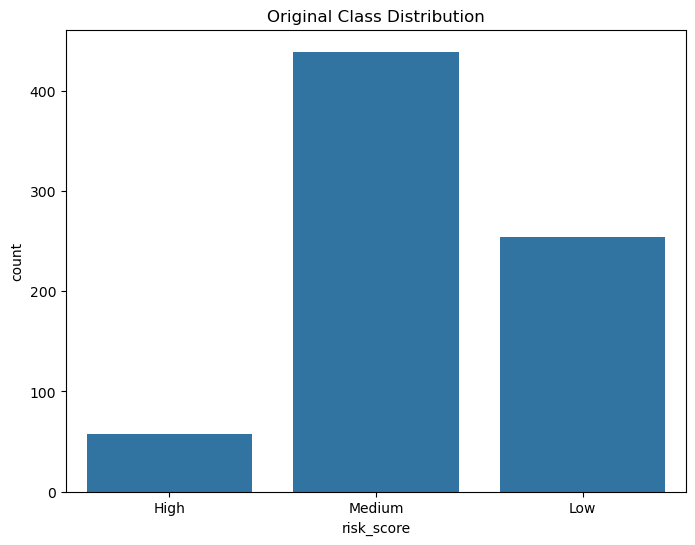

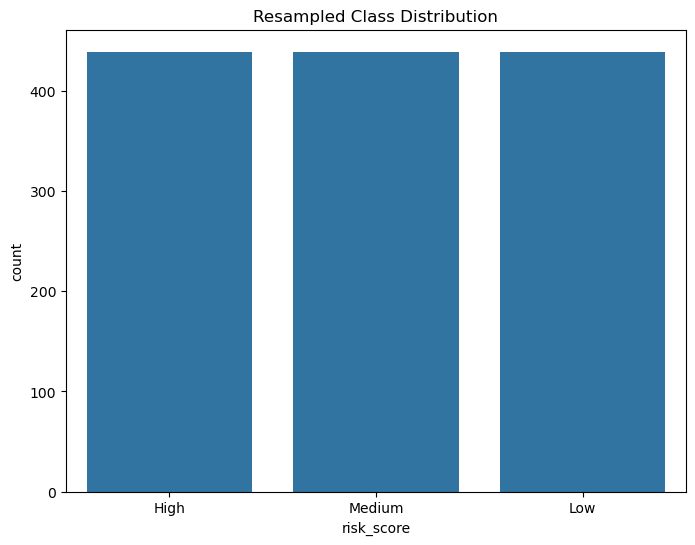

In [92]:
#graph comaprisons
plt.figure(figsize=(8,6))
sns.countplot(x=b_train)
plt.title("Original Class Distribution")
plt.show()

plt.figure(figsize=(8,6))
sns.countplot(x=b_resampled)
plt.title("Resampled Class Distribution")
plt.show()


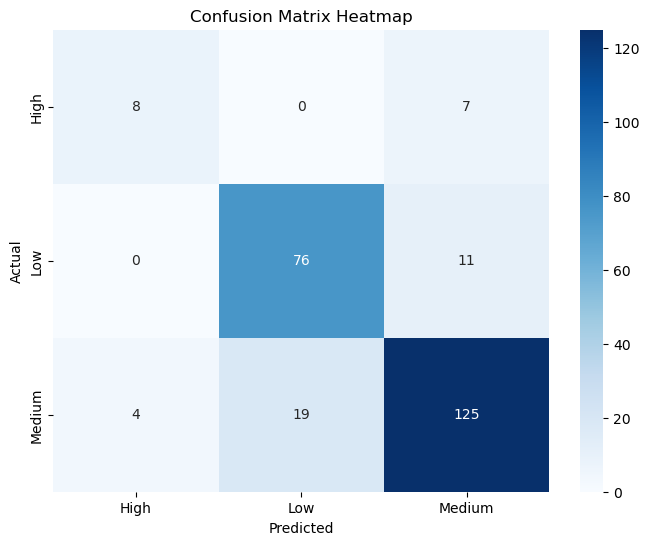

In [93]:
cm = confusion_matrix(b_test, b_pred)

#confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['High', 'Low', 'Medium'], yticklabels=['High', 'Low', 'Medium'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

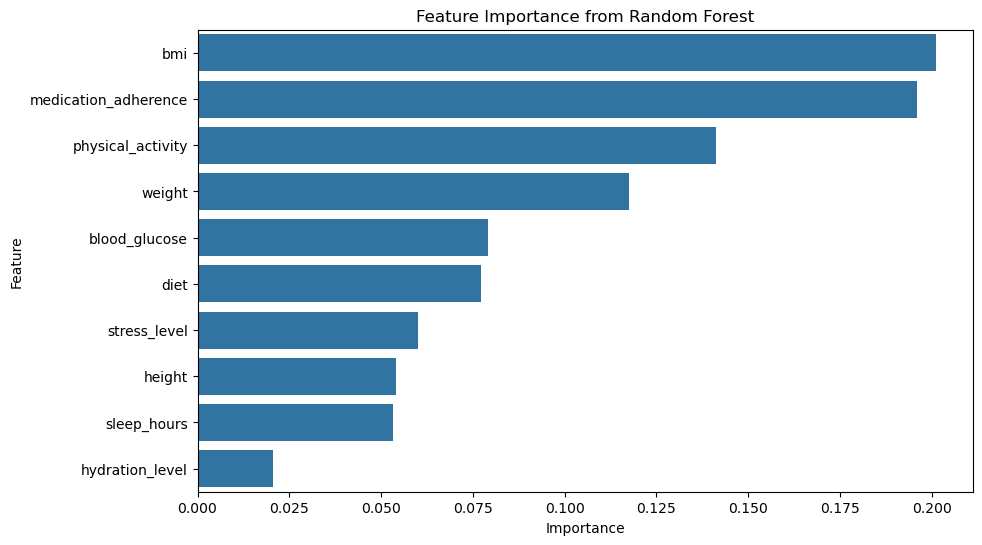

In [97]:
feature_importance = rf.feature_importances_

feature_names = a_train.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Feature Importance from Random Forest")
plt.show()